In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_0 = np.random.rand(20,2) + 1
X_1 = np.random.rand(20,2) - 1
X = np.concatenate([X_0, X_1])
#np.random.shuffle(X)

In [3]:
def L2_dist(a, b):
    return np.linalg.norm(a-b)

In [4]:
def compute_G0(X, d=L2_dist):
    W = np.zeros((len(X), len(X)))
    for i in range(len(X)-1):
        for j in range(i+1, len(X)):
            W[i, j] = d(X[i], X[j])
            W[j, i] = d(X[i], X[j])
    D_sqinv = np.diag(np.sum(W, axis=0) ** -0.5)
    return W, D_sqinv

In [5]:
W, D_sqinv = compute_G0(X)

In [6]:
def compute_laplacian(W, D_sqinv):
    return np.eye(len(W)) - D_sqinv @ W @ D_sqinv

In [7]:
L = compute_laplacian(W, D_sqinv)

In [8]:
def compute_AM_normalised(L, D_sqinv, M=len(L)):
    V, A = np.linalg.eig(L)
    V = 1 - V
    idx = V.argsort()  
    V = V[idx]
    A = A[:,idx]
    V = np.diag(V)
    A = A[:, :M]
    return D_sqinv @ A

In [9]:
A = compute_AM_normalised(L, D_sqinv, 3)

In [49]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    # Search function, ça trouve un point fixe en fait, en partant de celui qu'on veut

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    #  Applying Kruskal algorithm
    def kruskal_algo(self):
        result = []
        hierarchy = []
        i, e = 0, 0
        self.graph = sorted(self.graph, key=lambda item: item[2])
        rank = [0] * self.V
        parent = list(range(self.V))
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i += 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e += 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
            hierarchy.append(result.copy())
        return hierarchy


In [50]:
g = Graph(4)
#g.add_edge(0, 1, 4)
#g.add_edge(0, 2, 1)
#g.add_edge(0, 3, 2)
#g.add_edge(1, 2, 5)
#g.add_edge(1, 3, 3)
#g.add_edge(2, 3, 8)
g.add_edge(0, 1, 8)
g.add_edge(0, 2, 6)
g.add_edge(0, 3, 1)
g.add_edge(1, 2, 2)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, 4)

g.kruskal_algo()

[[[0, 3, 1]], [[0, 3, 1], [1, 2, 2]], [[0, 3, 1], [1, 2, 2], [2, 3, 4]]]

In [51]:
def compute_Ge(A, d=L2_dist):
    g = Graph(len(A))
    W = np.zeros((len(A), len(A)))
    for i in range(len(A)-1):
        for j in range(i+1, len(A)):
            W[i, j] = d(A[i], A[j])
            W[j, i] = d(A[i], A[j])
            g.add_edge(i, j, d(A[i], A[j]))
    return W, g

In [52]:
W, g = compute_Ge(A)

In [53]:
hierarchy = g.kruskal_algo()

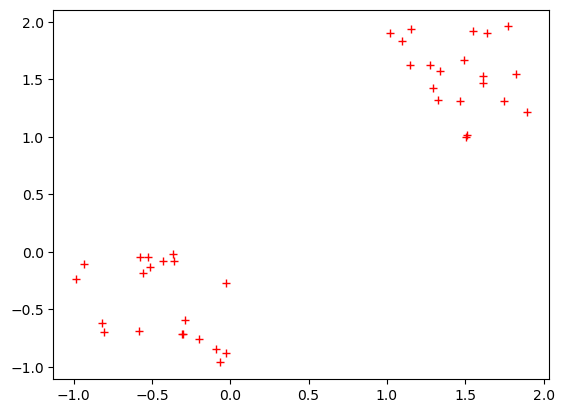

In [14]:
plt.plot(X[:,0], X[:,1], 'r+')